# DATA AND PROBLEM DESCRIPTION

The data was downloaded from the website: https://www.kaggle.com/datasets/gargmanas/sentimental-analysis-for-tweets

The dataset contains tweets on the basis of which it has been determined whether the author of the post is depressed or not. I will conduct a sentiment analysis that will determine, based on the emotions hidden behind the tweets, whether a particular tweet is written by a person with depression (labeled as 1 in the decision class) or whether the person does not have depression (labeled as 0 in the decision class). The dataset contains 10,314 tweets.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
df=pd.read_csv('sentiment_tweets3.csv')

# DATA ANALYSIS

In [3]:
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [4]:
df.info()
#There are no missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [5]:
df.describe()

,Index,label (depression result)
count,10314.000000,10314.000000
mean,491253.470525,0.224355
std,261688.134407,0.417177
min,106.000000,0.000000
25%,263019.250000,0.000000
50%,514988.000000,0.000000
75%,773521.500000,0.000000
max,802313.000000,1.000000


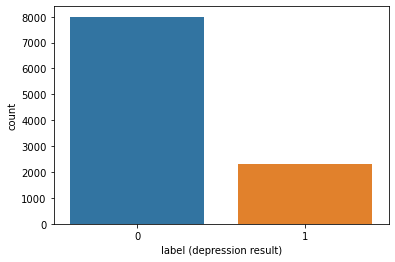

In [6]:
sns.countplot(x='label (depression result)',data = df)
plt.show()

In [7]:
print('Number of tweets from individuals without depression and with depression: ', df.groupby('label (depression result)')['message to examine'].count());

Number of tweets from individuals without depression and with depression:  label (depression result)
0    8000
1    2314
Name: message to examine, dtype: int64


The chart shows that there are many more tweets written by individuals without depression in the data.
Due to the asymmetric distribution of the data, the constructed model may have a tendency to classify the majority
of tweets as written by individuals without depression. In other words, the accuracy of classifying tweets from
individuals without depression will be very high, in contrast to the accuracy of classifying tweets from individuals with depression.


In [8]:
df['length']=df['message to examine'].apply(len)

In [9]:
df

,Index,message to examine,label (depression result),length
0,106,just had a real good moment. i missssssssss hi...,0,57
1,217,is reading manga http://plurk.com/p/mzp1e,0,42
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,84
3,288,@lapcat Need to send 'em to my accountant tomo...,0,135
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,45
...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,101
10310,802310,What do you do when depression succumbs the br...,1,97
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,96
10312,802312,dont mistake a bad day with depression! everyo...,1,57


# VISUALISATION

<AxesSubplot:title={'center':'length of tweets'}, ylabel='Frequency'>

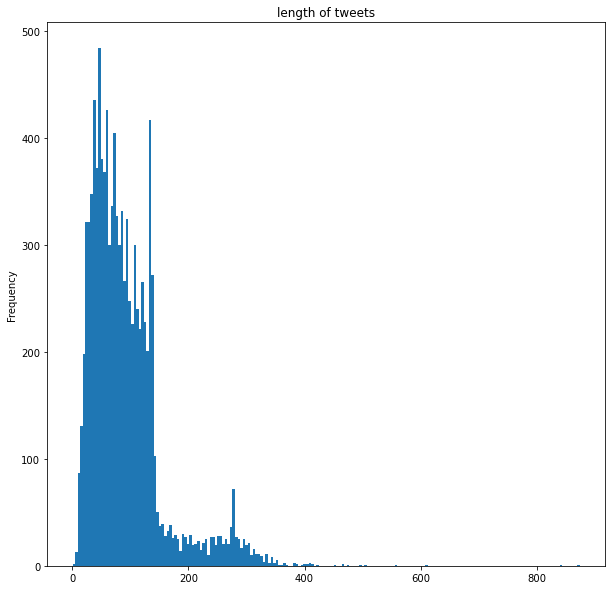

In [10]:
df['length'].plot(bins=200, kind='hist', figsize=(10,10), title='length of tweets') 

In [11]:
df['length'].describe()

count    10314.000000
mean        92.616153
std         64.670905
min          1.000000
25%         48.000000
50%         78.000000
75%        119.000000
max        874.000000
Name: length, dtype: float64

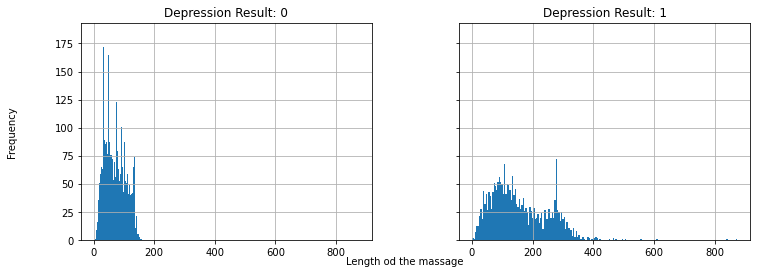

In [12]:
#Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharex=True, sharey=True)

#Create histograms for each class
for i, label in enumerate(df['label (depression result)'].unique()):
    df[df['label (depression result)'] == label].hist(column='length', bins=200, ax=axes[i])
    axes[i].set_title(f'Depression Result: {label}')

#Add a common x-axis label for the entire figure
fig.text(0.5, 0.04, 'Length od the massage', ha='center')

#Add a common y-axis label for the entire figure
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')

#Show the plot
plt.show()

The above histograms show the distribution of tweet lengths. The chart on the left displays the distribution 
of tweet lengths from people without depression, while the chart on the right shows the distribution of tweet 
lengths from people with depression. Comparing these two charts makes it clear that individuals with depression 
often write longer messages."

In [13]:
df.groupby('label (depression result)')['length'].describe()

,count,mean,std,min,25%,50%,75%,max
label (depression result),,,,,,,,
0,8000.0,73.560000,35.875678,6.0,44.0,69.0,102.0,232.0
1,2314.0,158.497407,92.728396,1.0,86.0,137.5,231.0,874.0


The average number of characters used in tweets by people without depression is 73.56, whereas the same average 
for people with depression is 158.50.

# DATA CLEANING

In [14]:
import nltk
import string
nltk.download('stopwords')
import re
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\klacz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
df['message to examine'].head(15)

0     just had a real good moment. i missssssssss hi...
1            is reading manga  http://plurk.com/p/mzp1e
2     @comeagainjen http://twitpic.com/2y2lx - http:...
3     @lapcat Need to send 'em to my accountant tomo...
4         ADD ME ON MYSPACE!!!  myspace.com/LookThunder
5                 so sleepy. good times tonight though 
6     @SilkCharm re: #nbn as someone already said, d...
7                    23 or 24ï¿½C possible today. Nice 
8           nite twitterville  workout in the am  -ciao
9       @daNanner Night, darlin'!  Sweet dreams to you 
10                             Good morning everybody! 
11    Finally! I just created my WordPress Blog. The...
12    kisha they cnt get over u til they get out frm...
13    @nicolerichie Yes i remember that band, It was...
14               I really love reflections and shadows 
Name: message to examine, dtype: object

In [16]:
nltk.download('wordnet')
from nltk.corpus import stopwords

#deleting stopwords:
STOPWORDS = set(stopwords.words('english'))

def stopwords(text):
    return " ".join([word for word in text.split() if word not in STOPWORDS])

df['message to examine'] = df['message to examine'].apply(stopwords)

df

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\klacz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Index,message to examine,label (depression result),length
0,106,"real good moment. missssssssss much,",0,57
1,217,reading manga http://plurk.com/p/mzp1e,0,42
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,84
3,288,@lapcat Need send 'em accountant tomorrow. Odd...,0,135
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,45
...,...,...,...,...
10309,802309,"No Depression G Herbo mood on, i'm done stress...",1,101
10310,802310,What depression succumbs brain makes feel like...,1,97
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,96
10312,802312,dont mistake bad day depression! everyone 'em!,1,57


In [17]:
def text_process(text):
    #The regular expression pattern describing links
    pattern = re.compile(r'(https?://\S+)|(www\.\S+)|(\S+\.\S+/\S+)')
    text = re.sub(pattern, "", text)
    #Changing uppercase letters to lowercase
    text = text.lower()
    #Replacing digits with nothing
    text = re.sub('\d', '', text)
    #Removing whitespace at the beginning and end of the text
    text = text.strip()
    #Removing punctuation
    brak_interpunkcji = [char for char in text if char not in string.punctuation]
    #Rejoining
    text = ''.join(brak_interpunkcji)
    return text


#Checking if the function works.

df['message to examine']=df['message to examine'].apply(text_process)


In [18]:
#Lemmatization
lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()

def lemmatizeRows(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df['message to examine'] = df['message to examine'].apply(lemmatizeRows)

df


,Index,message to examine,label (depression result),length
0,106,real good moment miss much,0,57
1,217,reading manga,0,42
2,220,comeagainjen,0,84
3,288,lapcat need send em accountant tomorrow oddly ...,0,135
4,540,add me on myspace,0,45
...,...,...,...,...
10309,802309,no depression g herbo mood on im done stressin...,1,101
10310,802310,what depression succumbs brain make feel like ...,1,97
10311,802311,ketamine nasal spray show promise against depr...,1,96
10312,802312,dont mistake bad day depression everyone em,1,57


In [19]:
#stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemRows(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df['message to examine'] = df['message to examine'].apply(stemRows)

df.head(15)

,Index,message to examine,label (depression result),length
0,106,real good moment miss much,0,57
1,217,read manga,0,42
2,220,comeagainjen,0,84
3,288,lapcat need send em account tomorrow oddli i e...,0,135
4,540,add me on myspac,0,45
5,624,sleepi good time tonight though,0,37
6,701,silkcharm re nbn someon alreadi said fiber hom...,0,109
7,808,ï¿½c possibl today nice,0,34
8,1193,nite twittervil workout ciao,0,43
9,1324,danann night darlin sweet dream,0,47


# CREATING A VECTORIZER

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
transformer = CountVectorizer(analyzer=text_process).fit(df['message to examine'])

#Printing the number of words
print(len(transformer.vocabulary_))

116


In [22]:
from sklearn.feature_extraction.text import TfidfTransformer
messages_bow = transformer.transform(df['message to examine'])
tfidf_transformer = TfidfTransformer().fit(messages_bow)


In [23]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(10314, 116)


# BUILDING THE MODEL

In [24]:
from sklearn.naive_bayes import MultinomialNB
depression_detect_model = MultinomialNB().fit(messages_tfidf, df['label (depression result)'])

In [25]:
#Testing if the model works for a random tweet

message10 = df['message to examine'][9]
bow10 = transformer.transform([message10])
tfidf10 = tfidf_transformer.transform(bow10)

print('predicted:', depression_detect_model.predict(tfidf10)[0])
print('expected:', df['label (depression result)'][3])

predicted: 0
expected: 0


# TRAIN TEST SPLIT

In [26]:
#30% of the data is taken as the test set, and 70% of the data is taken as the training set
from sklearn.model_selection import train_test_split

x_train, x_test, Y_train, Y_test = \
train_test_split(df['message to examine'], df['label (depression result)'], test_size=0.3)

print(len(x_train), len(x_test), len(x_train) + len(x_test))

7219 3095 10314


In [27]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)), 
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()),  
])

In [28]:
pipeline.fit(x_train,Y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000024FC8345700>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [29]:
predictions = pipeline.predict(x_test)

# MODEL EVALUATION

In [30]:
from sklearn.metrics import classification_report
print(classification_report(predictions,Y_test))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89      2983
           1       0.16      0.96      0.27       112

    accuracy                           0.81      3095
   macro avg       0.58      0.88      0.58      3095
weighted avg       0.97      0.81      0.87      3095



# CHECKING OTHER MODELS

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [32]:
#Compute_class_weight will be used to calculate class weights in a balanced way to account for class imbalance 
#and improve the model's performance

from sklearn.utils import compute_class_weight
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
dataVectorized = vectorizer.fit_transform(df['message to examine'])
dataVectorized.toarray().shape
x_train, x_test ,Y_train ,Y_test = train_test_split(dataVectorized, df['label (depression result)'], test_size=0.3,\
                                                    stratify= df['label (depression result)']  , random_state=0)


classWeights = compute_class_weight("balanced", classes = np.unique(df['label (depression result)']),
                                     y = df['label (depression result)'])
classWeights = dict(zip(np.unique(np.unique(df['label (depression result)'])), classWeights))
print(classWeights)


lr = LogisticRegression(class_weight=classWeights, random_state=0)
dt = DecisionTreeClassifier(class_weight=classWeights, random_state=0)
rf = RandomForestClassifier(class_weight=classWeights, random_state=0)
svc = LinearSVC(class_weight=classWeights, random_state=0)

lr.fit(x_train.toarray(), Y_train)
dt.fit(x_train.toarray(), Y_train)
rf.fit(x_train.toarray(), Y_train)
svc.fit(x_train.toarray(), Y_train)

{0: 0.644625, 1: 2.228608470181504}


LinearSVC(class_weight={0: 0.644625, 1: 2.228608470181504}, random_state=0)

In [33]:
lrPreds = lr.predict(x_test.toarray())
dtPreds = dt.predict(x_test.toarray())
rfPreds = rf.predict(x_test.toarray())
svcPreds = svc.predict(x_test.toarray())

In [34]:
from sklearn.metrics import classification_report

classification_report = classification_report(Y_test, lrPreds, target_names=['No','Yes'])
print('Logistic Regression Classification Report: \n',classification_report)

Logistic Regression Classification Report: 
               precision    recall  f1-score   support

          No       0.98      1.00      0.99      2401
         Yes       1.00      0.95      0.97       694

    accuracy                           0.99      3095
   macro avg       0.99      0.97      0.98      3095
weighted avg       0.99      0.99      0.99      3095



In [35]:
from sklearn.metrics import classification_report

classification_report = classification_report(Y_test, dtPreds, target_names=['No','Yes'])
print('Decision Tree Classification Report: \n',classification_report)

Decision Tree Classification Report: 
               precision    recall  f1-score   support

          No       0.99      0.92      0.96      2401
         Yes       0.78      0.98      0.87       694

    accuracy                           0.93      3095
   macro avg       0.89      0.95      0.91      3095
weighted avg       0.95      0.93      0.94      3095



In [36]:
from sklearn.metrics import classification_report

classification_report = classification_report(Y_test, rfPreds, target_names=['No','Yes'])
print('Random Forest Classification Report: \n',classification_report)

Random Forest Classification Report: 
               precision    recall  f1-score   support

          No       0.99      0.93      0.96      2401
         Yes       0.80      0.96      0.87       694

    accuracy                           0.94      3095
   macro avg       0.89      0.95      0.92      3095
weighted avg       0.95      0.94      0.94      3095



In [37]:
from sklearn.metrics import classification_report

classification_report = classification_report(Y_test, svcPreds, target_names=['No','Yes'])
print('Support Vector Classification Report: \n',classification_report)

Support Vector Classification Report: 
               precision    recall  f1-score   support

          No       0.99      1.00      0.99      2401
         Yes       1.00      0.95      0.98       694

    accuracy                           0.99      3095
   macro avg       0.99      0.98      0.98      3095
weighted avg       0.99      0.99      0.99      3095



Based on the above statistics, I choose the SVC - Support Vector Classification model.

In [38]:
#The best parameters for the model are being searched for
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

x_train, x_test, Y_train, Y_test = \
train_test_split(df['message to examine'], df['label (depression result)'], test_size=0.3)

#Model definition
model = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)), 
    ('tfidf', TfidfTransformer()),  
    ('classifier', LinearSVC()),  
])

param_grid = {
    'bow__max_features': [100, 500, 1000],
    'tfidf__use_idf': [True, False],
    'classifier__C': [5, 10, 20],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__max_iter': [100,300,500]
}


#Creating a Grid Search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)

#Performing the search."
grid_search.fit(x_train, Y_train)

#Best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'bow__max_features': 500, 'classifier__C': 20, 'classifier__max_iter': 300, 'classifier__penalty': 'l2', 'tfidf__use_idf': True}


Note: It took many iterations of the aboove Grid Search to come up with the final verion of optimal candiate values.

In [39]:
x_train, x_test, Y_train, Y_test = \
train_test_split(df['message to examine'], df['label (depression result)'], test_size=0.3)

In [40]:
#The parameters determined by grid search are being set as the best."
pipeline2 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process, max_features=500)), 
    ('tfidf', TfidfTransformer()),  
    ('classifier', LinearSVC(C=20,max_iter=300 )),  
])

# CHECKING IF THE SELECTED MODEL WORKS ON NEW DATA

In [41]:
pipeline2.fit(x_train,Y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000024FC8345700>,
                                 max_features=500)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LinearSVC(C=20, max_iter=300))])

In [42]:
pipeline2.predict(['I am very depressed'])[0]

1

In [43]:
pipeline2.predict(['I am happy and healthy'])[0]

0